This analysis includes: 
Data preprocessing |
Discriptive statistics analysis ( such as destributions, skewness , kurtosis ) |
Machine Learning Algorithms comparisons |
Confusion matrix and accuracy score comparisons |
Hypothesis testing.

In [3]:
import io
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.stats import skew, kurtosis
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score

In [4]:
# data_url=''
# data_stream=requests.get(data_url).content

df=pd.read_excel(r'C:\Users\User\OneDrive\Υπολογιστής\data\default_of_credit_card.xls', header=1, index_col=0)

# Maybe in a non-Unix system (e.g. Windows) this path doesn't work. Check with \ instead of /

In [5]:
# ** we set the df = df because the target column 'target' is not present in the index of the DataFrame.** 
df=df.rename(columns={'default payment next month': 'target'})
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [7]:
for column_name in df.columns[5:10]:  # Iterate over the column names using a slice
    unique_values = df[column_name].unique()
    print(f"Unique values in {column_name}: {unique_values}")

Unique values in PAY_0: [ 2 -1  0 -2  1  3  4  8  7  5  6]
Unique values in PAY_2: [ 2  0 -1 -2  3  5  7  4  1  6  8]
Unique values in PAY_3: [-1  0  2 -2  3  4  6  7  1  5  8]
Unique values in PAY_4: [-1  0 -2  2  3  4  5  7  6  1  8]
Unique values in PAY_5: [-2  0 -1  2  3  5  4  7  8  6]


Skewness , Kurtosis and descriptive statistics plots

In [8]:
continuous_columns = df.iloc[:, [*range(-9, -1), 0, 4]]
# we select only the continuous columns to observe their distributions, skewness, kurtosis

skewness = df[continuous_columns.columns].skew()
kurtosis = df[continuous_columns.columns].kurtosis()

print(f'skewness:\n{skewness}, \nkurtosis:\n{kurtosis}')

skewness:
BILL_AMT5     2.876380
BILL_AMT6     2.846645
PAY_AMT1     14.668364
PAY_AMT2     30.453817
PAY_AMT3     17.216635
PAY_AMT4     12.904985
PAY_AMT5     11.127417
PAY_AMT6     10.640727
LIMIT_BAL     0.992867
AGE           0.732246
dtype: float64, 
kurtosis:
BILL_AMT5      12.305881
BILL_AMT6      12.270705
PAY_AMT1      415.254743
PAY_AMT2     1641.631911
PAY_AMT3      564.311229
PAY_AMT4      277.333768
PAY_AMT5      180.063940
PAY_AMT6      167.161430
LIMIT_BAL       0.536263
AGE             0.044303
dtype: float64


What does Skewness and kurtosis tell us about out data behaviour?
Skewness measures the asymmetry of a distribution. It indicates whether the data is symmetric (skewness close to 0) or skewed to the left (negative skewness) or right (positive skewness).
BILL_AMT5,BILL_AMT6 , AGE  and LIMIT_BAL have Skewness close to 0, it suggests that the distribution is approximately symmetric. The data is evenly distributed around the mean, and there is no significant skewness.
on the other hand , the rest columns have positive skewness (right-skewed), which means the bulk of the data is concentrated towards the left, while some outliers or extreme values are present towards the right.


What does Kurtosis and kurtosis tell us about out data behaviour?
Kurtosis  describes the shape of a distribution by measuring the tail heaviness or lightness and the peakedness or flatness compared to a normal distribution.
Kurtosis greater than 3 ( all the columns except LIMIT_BAL and AGE ),indicates a leptokurtic distribution. Leptokurtic distributions have heavier tails and a sharper peak compared to a normal distribution. This means that there are more extreme values or outliers in the distribution, leading to thicker tails and a higher peak.
It laso suggests that the distribution has heavy tails and a sharp peak, indicating the presence of outliers or extreme values. 

We can see  Skewness and Kurtosis on the plots bellow.

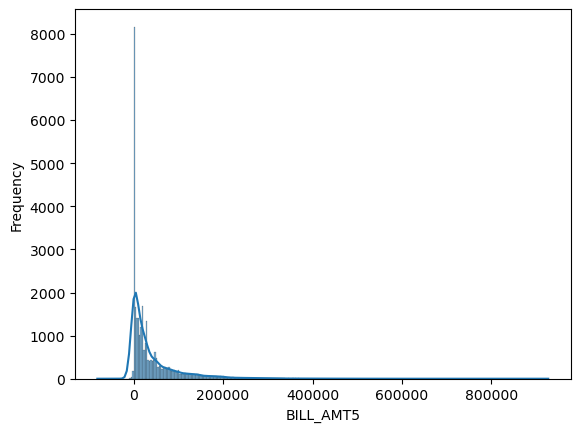

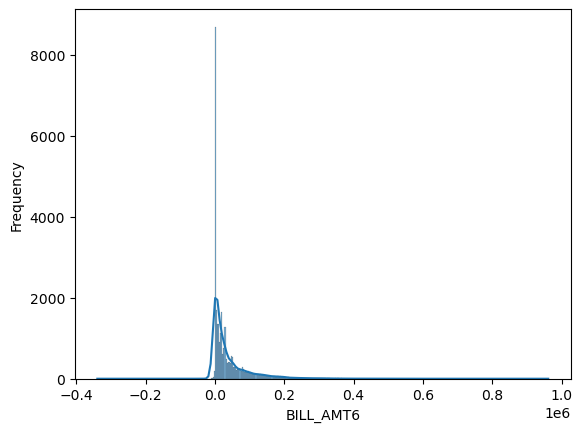

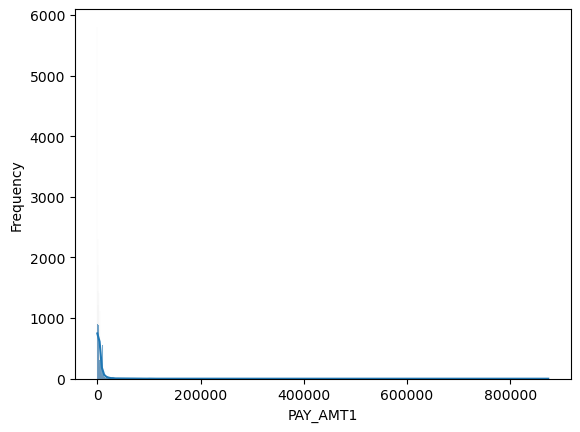

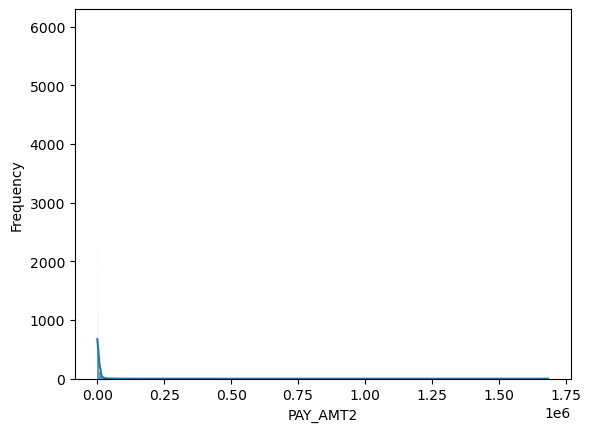

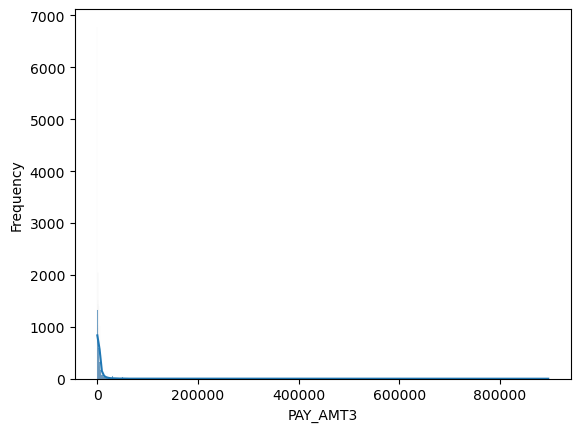

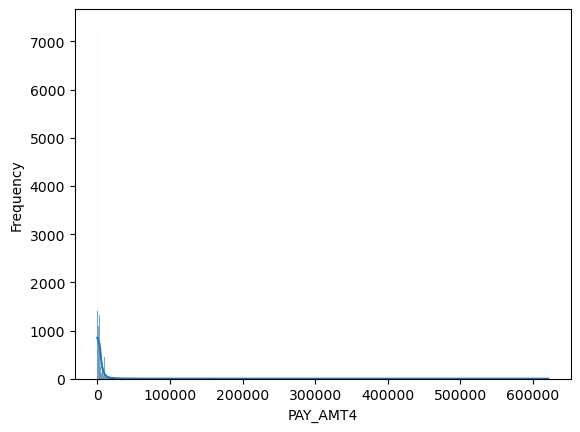

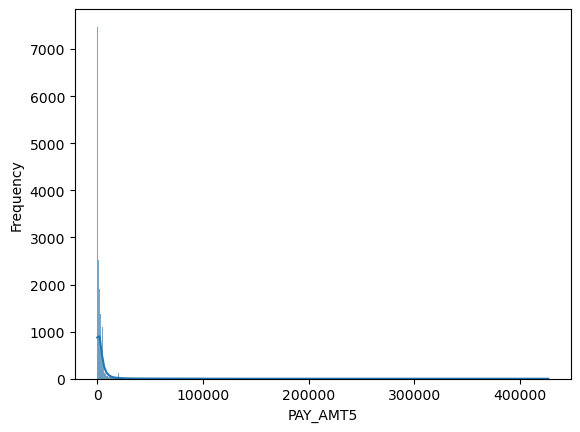

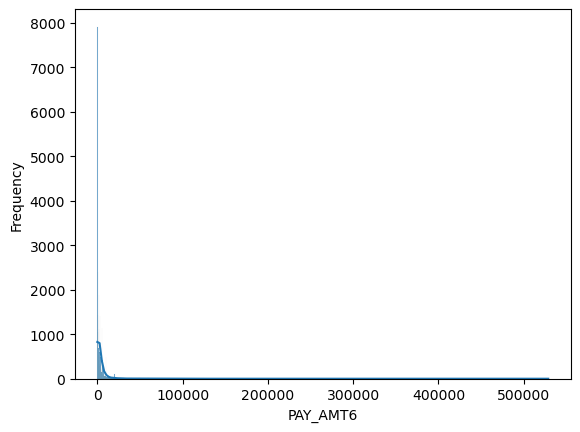

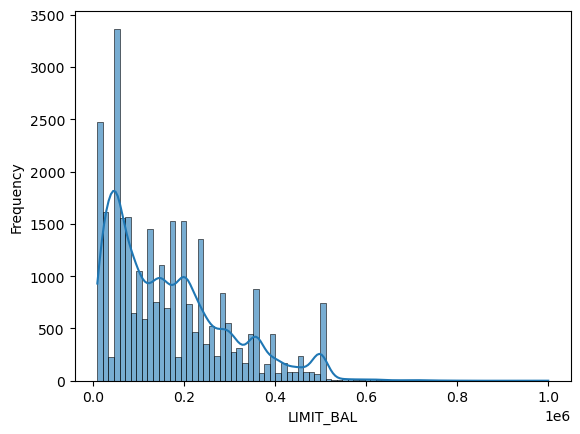

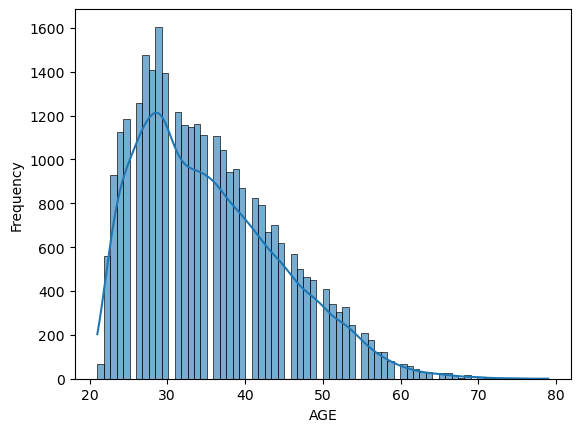

In [9]:
for col in continuous_columns:
    figsize = (6, 3)
    sns.histplot(data=continuous_columns, x=col, bins='auto', alpha=0.6, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

However, outliers can significantly affect statistical analyses that assume a normal distribution. It's important to identify and handle outliers appropriately to avoid biasing your results. Thus they will be deleted lately.

Outliers detection and remove 



Βoxplots help in understanding the key statistical characteristics of a dataset, such as the median, quartiles, range, and outliers. For our outliers detection we will use boxplots. 
The length of the box represents the spread of the middle 50% of the data. A longer box indicates a higher variability, while a shorter box indicates a lower variability.
The position of the median inside the box gives an idea of the skewness of the distribution. If the median is closer to the bottom of the box, the distribution is skewed to the lower values, and if it is closer to the top, the distribution is skewed to the higher values.
1. Median: The line inside the box represents the median, which is the middle value of the dataset when it is sorted in ascending order. It divides the data into two equal halves.

2. Quartiles: The box itself represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). The lower edge of the box indicates Q1, and the upper edge indicates Q3. The IQR contains the middle 50% of the data.

3. Whiskers: The lines extending from the box, called whiskers, show the range of the data. By default, the whiskers extend up to 1.5 times the IQR from the upper and lower edges of the box. Data points beyond the whiskers are considered outliers.

4. Outliers: Individual data points that fall beyond the whiskers are represented as individual dots or asterisks. They are potential extreme values that are far from the central tendency of the dataset.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


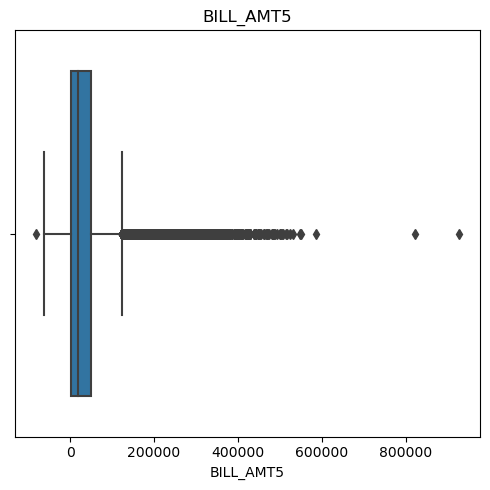

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


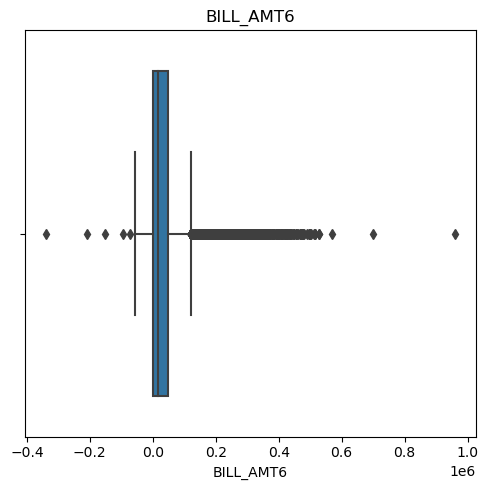

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


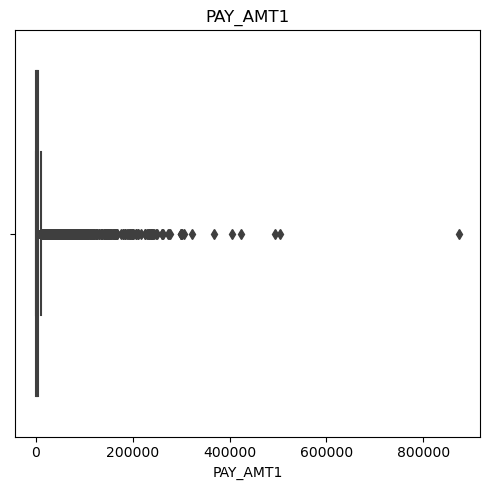

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


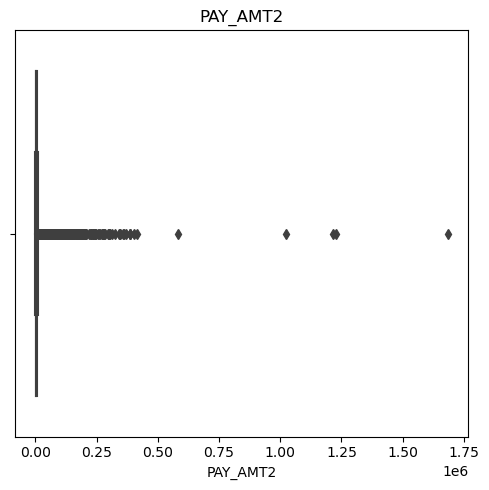

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


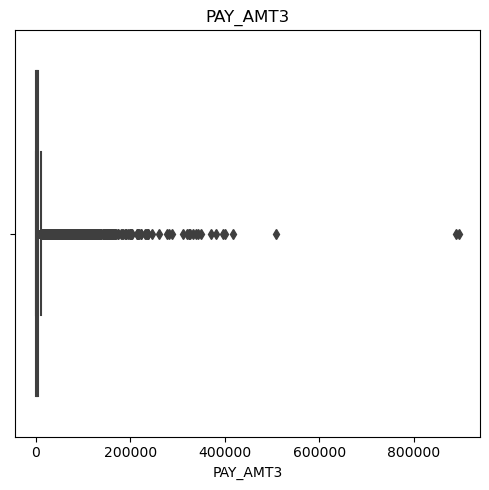

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


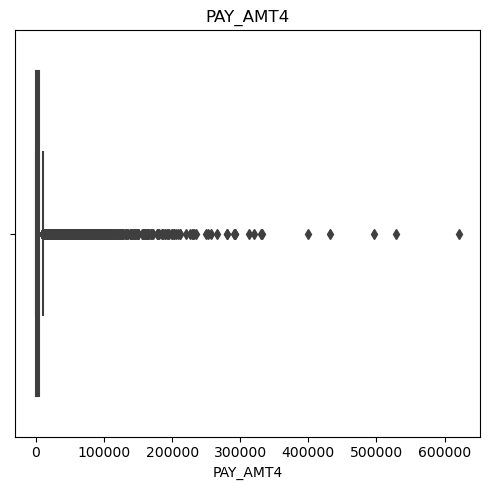

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


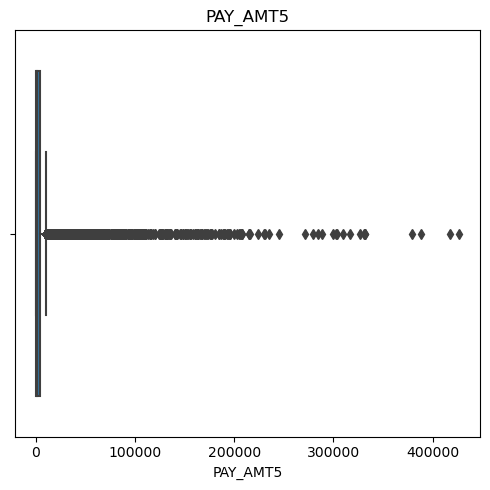

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


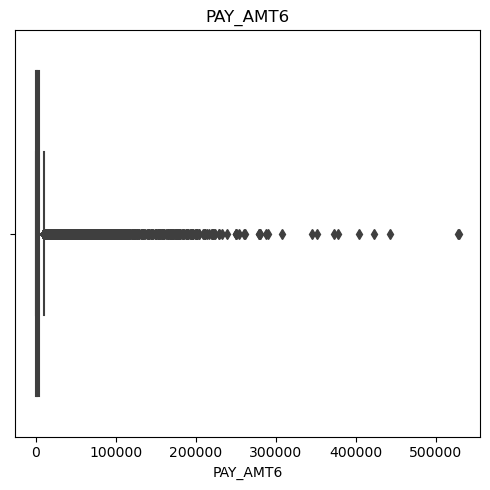

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


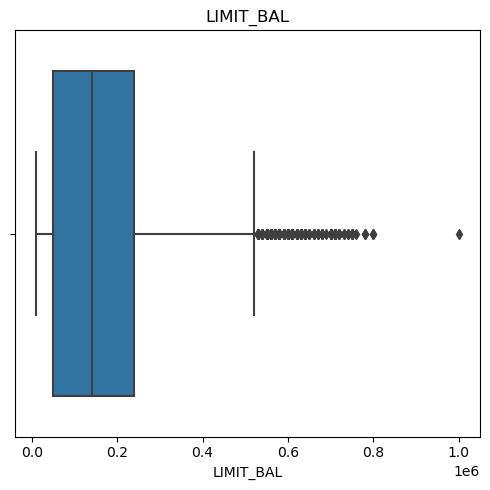

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


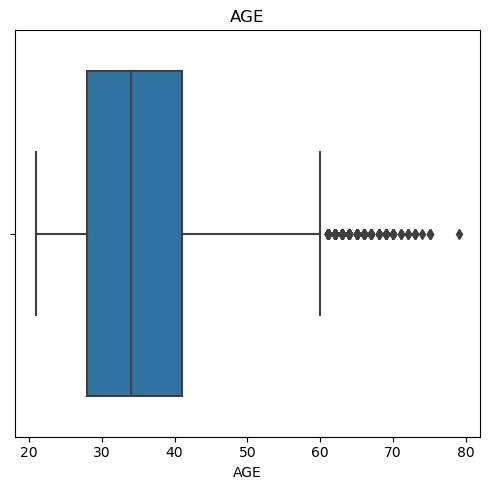

In [10]:
for val in continuous_columns:
    fig, ax = plt.subplots(figsize=(5, 5))  # Create a new figure and axes for each boxplot
    sns.boxplot(continuous_columns[val], ax=ax)
    ax.set_title(val)
    plt.tight_layout()
    plt.show()

To delete outliers we will use the Interquartile Range. We first calculate the  quartiles and IQR and then we delete the outliers. We then create a new dataframe with the values only between the quantiles.

In [11]:
Q1 = continuous_columns.quantile(0.25)
Q3 = continuous_columns.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
# This line of code creates a Boolean mask by comparing each value in continuous_columns with the lower and upper thresholds for outliers.
outliers = (continuous_columns < (Q1 - 1.5 * IQR)) | (continuous_columns > (Q3 + 1.5 * IQR)) 
df_no_outliers = continuous_columns[~outliers.any(axis=1)]

We will plot again the data against the index value/ column to see them without outliers. Some values remain after the whiskers and we will not delete them because they will affect out models and they might get overfitted

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


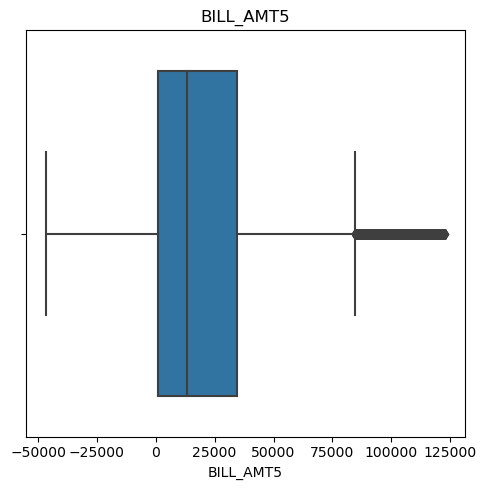

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


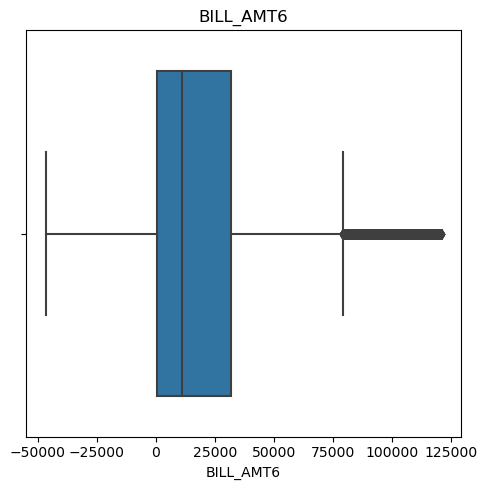

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


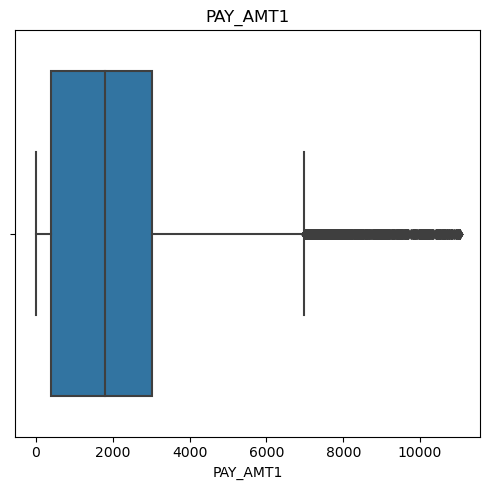

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


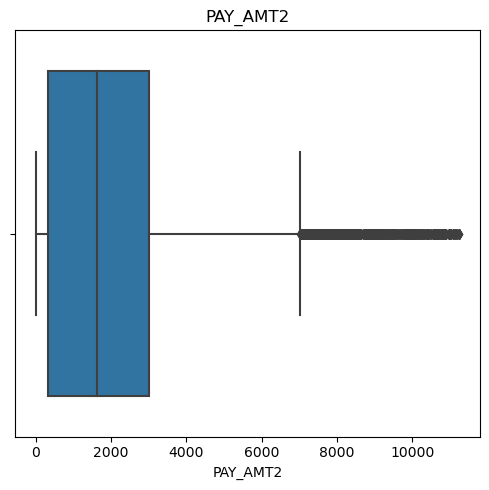

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


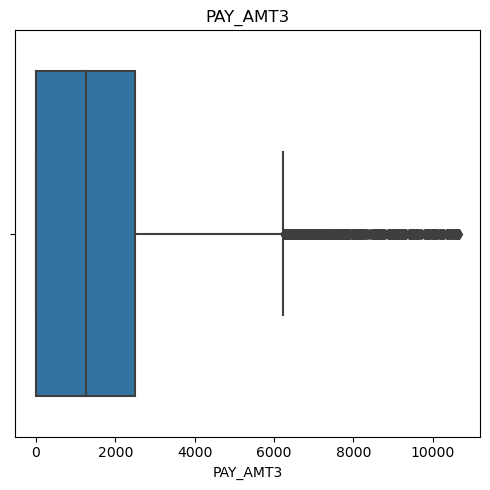

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


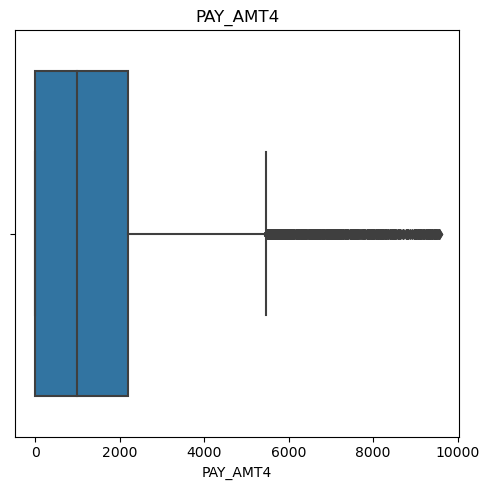

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


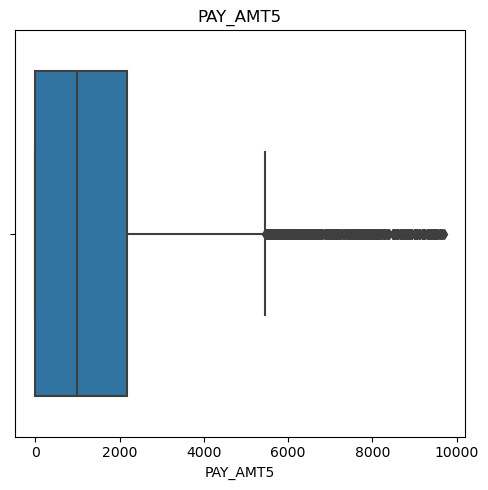

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


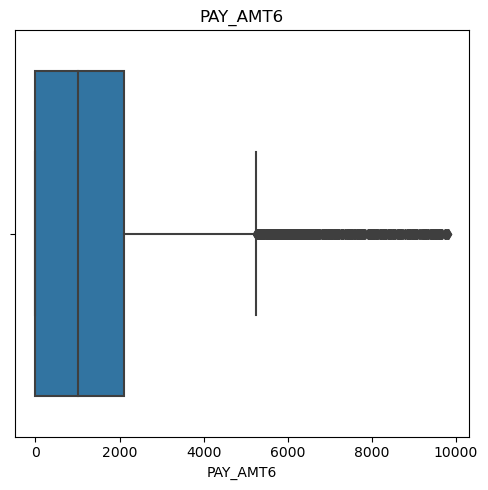

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


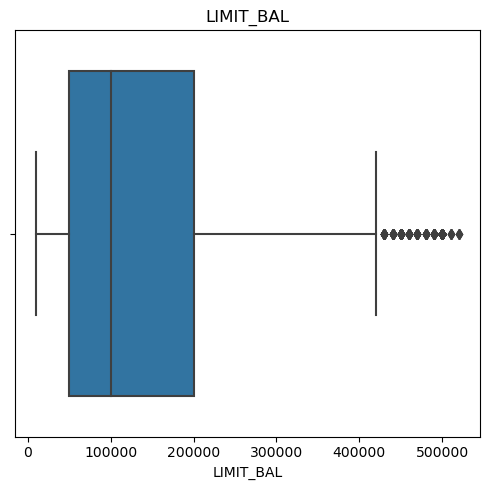

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


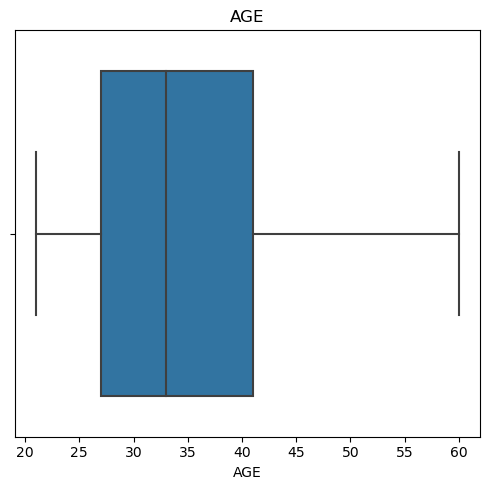

In [12]:
for val in df_no_outliers:
    fig, ax = plt.subplots(figsize=(5, 5))  # Create a new figure and axes for each boxplot
    sns.boxplot(df_no_outliers[val], ax=ax)
    ax.set_title(val)
    plt.tight_layout()
    plt.show()

In [13]:
print("Shape of the dataframe before removing outliers:", df_no_outliers.shape)
print("Shape of the dataframe after removing outliers:", continuous_columns.shape)
print("")
print( 
    "we can see that more than 10_000 values where removed"
)


Shape of the dataframe before removing outliers: (19948, 10)
Shape of the dataframe after removing outliers: (30000, 10)

we can see that more than 10_000 values where removed


Now we will append this data set (df_no_outliers) with the columns 
of the original data set SEX and Target , but we will also delete 10.052 from each column
where the half will be the one value and the 5026 half the other value. Since these 3 columns has binary values.
In addition, this will not affect our results.

In [14]:
#first lets get our 3 columns and convert them to lists
new_df = df.copy()
rows_to_delete = new_df[new_df['SEX'].isin([0, 1])].groupby('SEX').head(5026).index
new_df = new_df.drop(rows_to_delete)

rows_to_delete = new_df[new_df['target'].isin([2, 1])].groupby('target').head(5026).index
new_df = new_df.drop(rows_to_delete)


sex_list = new_df['SEX'].tolist()
target_list = new_df['target'].tolist()

In [15]:
print(sex_list)
print(target_list)

dict_df = { 
    "SEX " : sex_list,
    "target": target_list
          
}
          


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [16]:
print(len(sex_list))
print(len(target_list))
print("we see they have the same shape")


19948
19948
we see they have the same shape


In [17]:
# it is important in this step before we merg the dataframes, to reset the index because the data will get a mixed shaped
# we will also ensure that the index starts from 1 and ends to 19_948 for the 2 dataframes
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers.index += 1
df_no_outliers

,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL,AGE
1,0,0,0,689,0,0,0,0,20000,24
2,3455,3261,0,1000,1000,1000,0,2000,120000,26
3,14948,15549,1518,1500,1000,1000,1000,5000,90000,34
4,28959,29547,2000,2019,1200,1100,1069,1000,50000,37
5,19619,20024,2500,1815,657,1000,1000,800,50000,37
...,...,...,...,...,...,...,...,...,...,...
19944,2500,2500,0,0,0,0,0,0,210000,34
19945,0,0,2000,0,0,0,0,0,10000,43
19946,82607,81158,7000,3500,0,7000,0,4000,80000,34
19947,5190,0,1837,3526,8998,129,0,0,150000,43


In [18]:
data = pd.DataFrame(dict_df)
data.reset_index(drop=True, inplace=True)
data.index += 1
data

,SEX,target
1,2,0
2,2,0
3,2,0
4,2,0
5,2,0
...,...,...
19944,1,0
19945,1,0
19946,1,1
19947,1,1


In [19]:
new_df = pd.concat([df_no_outliers, data], axis=1)
new_df


,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LIMIT_BAL,AGE,SEX,target
1,0,0,0,689,0,0,0,0,20000,24,2,0
2,3455,3261,0,1000,1000,1000,0,2000,120000,26,2,0
3,14948,15549,1518,1500,1000,1000,1000,5000,90000,34,2,0
4,28959,29547,2000,2019,1200,1100,1069,1000,50000,37,2,0
5,19619,20024,2500,1815,657,1000,1000,800,50000,37,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19944,2500,2500,0,0,0,0,0,0,210000,34,1,0
19945,0,0,2000,0,0,0,0,0,10000,43,1,0
19946,82607,81158,7000,3500,0,7000,0,4000,80000,34,1,1
19947,5190,0,1837,3526,8998,129,0,0,150000,43,1,1


Decision Tree

The accuracy of our decision tree is : 0.9566416040100251
F1-measure: 0.03351955307262569
Recall: 0.037037037037037035


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


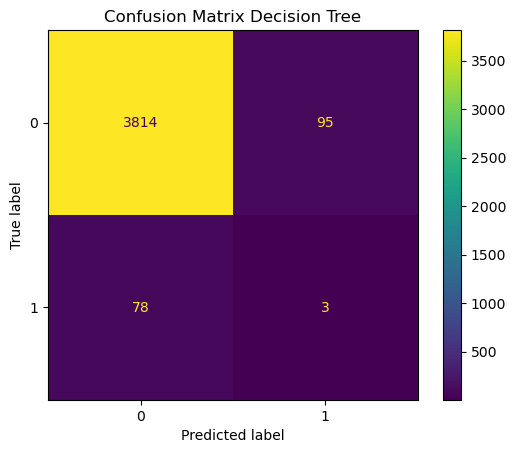

In [20]:
X = new_df.drop('target', axis=1)
y = new_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


accuracy_tree = accuracy_score(y_test, y_pred)
f1_tree  = f1_score(y_test, y_pred)
recall_tree  = recall_score(y_test, y_pred)
print(f"The accuracy of our decision tree is : {accuracy_tree}")
print("F1-measure:", f1_tree)
print("Recall:", recall_tree)

confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model, X_test, y_test)
plt.title("Confusion Matrix Decision Tree")
plt.show()

True Negative (TN): 3810
The number of instances that are actually negative (class 0) and correctly predicted as negative by the model.
False Positive (FP): 99
The number of instances that are actually negative (class 0) but incorrectly predicted as positive by the model.
False Negative (FN): 78
The number of instances that are actually positive (class 1) but incorrectly predicted as negative by the model.
True Positive (TP): 4
The number of instances that are actually positive (class 1) and correctly predicted as positive by the model.



Random Forest

The accuracy of random forest is : 0.9786967418546366
F1-measure: 0.0
Recall: 0.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


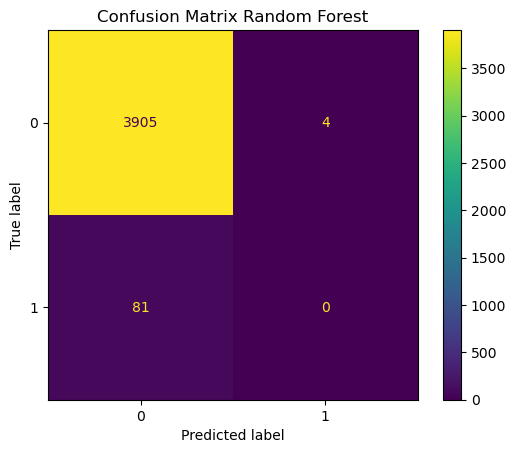

In [21]:
model_1 = RandomForestClassifier(n_estimators=100)

model_1.fit(X_train, y_train)

y_pred = model_1.predict(X_test)

accuracy_randomforest = accuracy_score(y_test, y_pred)
f1_randomforest  = f1_score(y_test, y_pred)
recall_randomforest = recall_score(y_test, y_pred)
print(f"The accuracy of random forest is : {accuracy_randomforest}")
print("F1-measure:", f1_randomforest)
print("Recall:", recall_randomforest)

confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_1, X_test, y_test)
plt.title("Confusion Matrix Random Forest")
plt.show()

In this case, the model correctly predicted the majority of positive instances (TP = 3906), but there are three positive instances that are falsely predicted as negative (FN = 3). Additionally, the model has a high number of false positives (FP = 81), indicating a high rate of false alarms or falsely predicting positive instances.

Support Vector Machine

The accuracy of SVM is : 0.9796992481203007
F1-measure: 0.0
Recall: 0.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


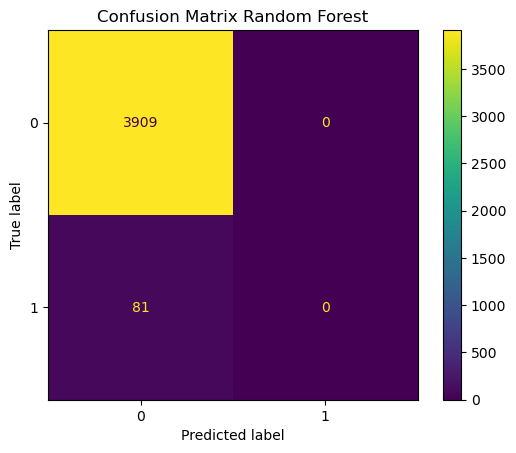

In [22]:
model_2 = SVC()

model_2.fit(X_train, y_train)

y_pred = model_2.predict(X_test)

accuracy_SVM = accuracy_score(y_test, y_pred)
f1_SVM  = f1_score(y_test, y_pred)
recall_SVM = recall_score(y_test, y_pred)
print(f"The accuracy of SVM is : {accuracy_SVM}")
print("F1-measure:", f1_SVM)
print("Recall:", recall_SVM)

confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_2, X_test, y_test)
plt.title("Confusion Matrix Random Forest")
plt.show()

In this case, the model correctly predicted all the negative instances (TN = 0), but it failed to predict any positive instances (TP = 0), resulting in a complete separation or misclassification of the positive class. The model has a high number of false positives (FP = 81), indicating a high rate of false alarms or falsely predicting positive instances.



KNN

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.p

The accuracy for KNN model is: 0.9794486215538847
F1-measure: 0.0
Recall: 0.0


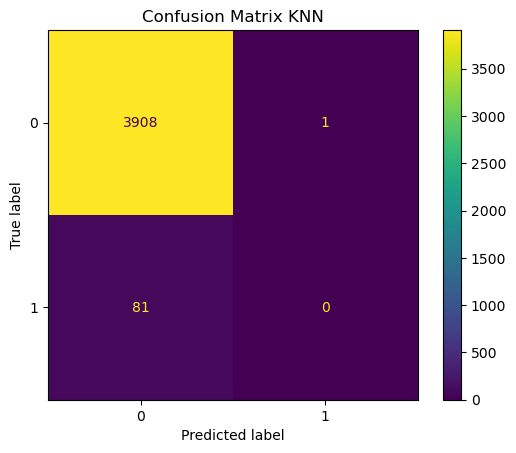

In [23]:
model_3 = KNeighborsClassifier(n_neighbors=5)

model_3.fit(X_train, y_train)

y_pred = model_3.predict(X_test)

accuracy_KNN = accuracy_score(y_test, y_pred)
f1_KNN  = f1_score(y_test, y_pred)
recall_KNN = recall_score(y_test, y_pred)
print("The accuracy for KNN model is:", accuracy_KNN)
print("F1-measure:", f1_KNN)
print("Recall:", recall_KNN)

confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_3, X_test, y_test)
plt.title("Confusion Matrix KNN")
plt.show()

In this case, the model correctly predicted the majority of positive instances (TP = 3908), but there is one positive instance that is falsely predicted as negative (FN = 1). Additionally, the model has a high number of false positives (FP = 81), indicating a high rate of false alarms or falsely predicting positive instances.

Logistic Regression


The accuracy of logisticRegression is : 0.9796992481203007
F1-measure: 0.0
Recall: 0.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


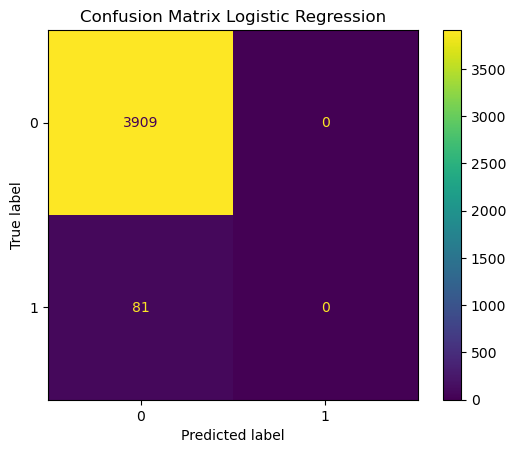

In [24]:
model_4 = LogisticRegression(max_iter=1000)

model_4.fit(X_train, y_train)

y_pred = model_4.predict(X_test)

accuracy_LogReg = accuracy_score(y_test, y_pred)
f1_LogReg = f1_score(y_test, y_pred)
recall_LogReg = recall_score(y_test, y_pred)
print("The accuracy of logisticRegression is :", accuracy_LogReg)
print("F1-measure:", f1_LogReg)
print("Recall:", recall_LogReg)

confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(model_4, X_test, y_test)
plt.title("Confusion Matrix Logistic Regression")
plt.show()

Like the Support vector machine, the model correctly predicted all the negative instances (TN = 0), but it failed to predict any positive instances (TP = 0), resulting in a complete separation or misclassification of the positive class. The model has a high number of false positives (FP = 81), indicating a high rate of false alarms or falsely predicting positive instances.

In [25]:
print(f"The accuracy of our decision tree is : {accuracy_tree}")
print(f"The accuracy of random forest is : {accuracy_randomforest}")
print(f"The accuracy of SVM is : {accuracy_SVM}")
print("The accuracy for KNN model is:", accuracy_KNN)
print(f"The accuracy of logisticRegression is : {accuracy_LogReg}")


The accuracy of our decision tree is : 0.9566416040100251
The accuracy of random forest is : 0.9786967418546366
The accuracy of SVM is : 0.9796992481203007
The accuracy for KNN model is: 0.9794486215538847
The accuracy of logisticRegression is : 0.9796992481203007


The support vector machine (SVM) model achieved an accuracy of about 97.97%. SVM is a powerful classification algorithm that finds an optimal hyperplane to separate different classes in the data. It performed slightly better than the random forest model in this case, The K-nearest neighbors (KNN) model achieved an accuracy of approximately 97.94%. KNN is a non-parametric algorithm that classifies new instances based on their similarity to the K nearest neighbors in the training set. It performed on par with the SVM model. The logistic regression model achieved an accuracy score of about 97.97% and it performed on par with the SVM and KNN models in this case. This happened because there might be several reasons:
1.  KNN performs well when the decision boundaries are nonlinear and the classes are well separated, while SVM excels in finding optimal hyperplanes to separate different classes. If the data satisfies the assumptions of both algorithms, they can achieve similar accuracy levels.
2. The performance of KNN and SVM can be affected by the preprocessing steps applied to the data. Preprocessing techniques such as feature scaling or handling missing values, can impact the performance of both models. Because we deleted the outliers and used this technique for all the models ,this may have led to the same accuracy.

Overall, all the models achieved high accuracy scores, ranging from approximately 95.56% to 97.97%. Higher accuracy indicates better performance in correctly classifying instances. Nevertheless the best one is Support Vector Machine 

Hypothesis testing

In [26]:
from scipy.stats import ttest_ind

X_hypothesis = new_df.drop('target', axis=1)
y_hypothesis = new_df['target']

results = []
# Iterate over all columns and perform t-test
for test in X_hypothesis.columns:
    group1 = X_hypothesis.loc[y_hypothesis == 0, test]
    group2 = X_hypothesis.loc[y_hypothesis == 1, test]
    t_statistic, p_value = ttest_ind(group1, group2)
    results.append({'Feature': test, 'T-Statistic': t_statistic, 'P-value': p_value})

# Create a dataframe from the results list
results_df = pd.DataFrame(results)
results_df

,Feature,T-Statistic,P-value
0,BILL_AMT5,0.583609,5.594899e-01
1,BILL_AMT6,1.032375,3.019088e-01
2,PAY_AMT1,0.605800,5.446547e-01
3,PAY_AMT2,0.235960,8.134659e-01
4,PAY_AMT3,-1.359354,1.740499e-01
5,PAY_AMT4,0.410473,6.814634e-01
6,PAY_AMT5,1.064563,2.870866e-01
7,PAY_AMT6,-0.223366,8.232528e-01
8,LIMIT_BAL,-2.821828,4.779793e-03
9,AGE,-0.597867,5.499355e-01


The t-statistic measures the strength of the evidence against the null hypothesis. It quantifies how much the sample mean of a feature differs from the null hypothesis value, relative to the variability in the data.
The p-value is a measure of evidence against the null hypothesis. It represents the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data, assuming that the null hypothesis is true. In hypothesis testing, the p-value helps determine the statistical significance of the results. A smaller p-value suggests stronger evidence against the null hypothesis, indicating that the observed data is less likely to have occurred by chance alone.

In our table, for each feature, the t-statistic and p-value are presented. The last row for the feature "SEX," the t-statistic is 9.730477, and the p-value is 2.506257e-22 (a very small value close to zero). Since the p-value is significantly smaller than the usual significance level of 0.05, it provides strong evidence against the null hypothesis.

BILL_AMT5:
The t-statistic for "BILL_AMT5" is 0.583609, indicating the magnitude and direction of the difference between the sample mean of "BILL_AMT5" and the null hypothesis value.
With a p-value of 0.5594899, which is greater than the usual significance level of 0.05, there is insufficient evidence to reject the null hypothesis.

BILL_AMT6:
The t-statistic for "BILL_AMT6" is 1.032375, indicating the magnitude and direction of the difference between the sample mean of "BILL_AMT6" and the null hypothesis value.
With a p-value of 0.3019088, which is greater than the usual significance level of 0.05, there is insufficient evidence to reject the null hypothesis.

PAY_AMT1:

The t-statistic for "PAY_AMT1" is 0.605800, and the corresponding p-value is 0.5446547.
With a p-value of 0.5446547, which is greater than the usual significance level of 0.05, there is insufficient evidence to reject the null hypothesis.

PAY_AMT2:

The t-statistic for "PAY_AMT2" is 0.235960, and the corresponding p-value is 0.8134659.
With a p-value of 0.8134659, which is greater than the usual significance level of 0.05, there is insufficient evidence to reject the null hypothesis.

PAY_AMT3:
The t-statistic for "PAY_AMT3" is -1.359354, and the corresponding p-value is 0.1740499.
With a p-value of 0.1740499, which is greater than the usual significance level of 0.05, there is insufficient evidence to reject the null hypothesis.

PAY_AMT4:
The t-statistic for "PAY_AMT4" is 0.410473, and the corresponding p-value is 0.6814634.
With a p-value of 0.6814634, which is greater than the usual significance level of 0.05, there is insufficient evidence to reject the null hypothesis.

PAY_AMT5:
The t-statistic for "PAY_AMT5" is 1.064563, and the corresponding p-value is 0.2870866.
With a p-value of 0.2870866, which is greater than the usual significance level of 0.05, there is insufficient evidence to reject the null hypothesis.

PAY_AMT6:
The t-statistic for "PAY_AMT6" is -0.223366, and the corresponding p-value is 0.8232528.
With a p-value of 0.8232528, which is greater than the usual significance level of 0.05, there is insufficient evidence to reject the null hypothesis.

LIMIT_BAL: 
The t-statistic for "LIMIT_BAL" is -2.821828, and the corresponding p-value is 0.004779793.
With a p-value of 0.004779793, which is smaller than the usual significance level of 0.05, there is sufficient evidence to reject the null hypothesis.

In summary, we can conclude that there is a significant difference or relationship for the feature "LIMIT_BAL" with respect to the response variable, but for the other features ("PAY_AMT1," "PAY_AMT2," "PAY_AMT3," "PAY_AMT4," "PAY_AMT5," and "PAY_AMT6")